# Fashion-MNIST

![clothes](https://imgur.com/vpdOQ8a.png)

The MNIST dataset is (arguably) the most overused dataset for getting started with image classification. It contains **28x28 grayscale images of handwritten digits**, each with an associated label indicating which number is written (an integer between 0 and 9).

MNIST’s increased popularity over the past few years has given rise to a few issues.

## Why not MNIST?
1. MNIST is too easy. Convolutional nets can achieve 99.7% on MNIST easily, and similarly, even classic ML algorithms can achieve 97%.
2. MNIST is overused. Almost everyone who has experience with deep learning has come across MNIST at least once.
3. MNIST cannot represent modern CV tasks. This was noted by François Chollet, the author of the Keras library.

![mnist](https://imgur.com/vgyaHsc.png)

## Dataset

Researchers at Zalando (the e-commerce company) have developed a new image classification dataset called Fashion MNIST in hopes of replacing MNIST. This new dataset contains images of various articles of clothing and accessories — such as shirts, bags, shoes, and other fashion items.

The Fashion MNIST training set contains 60,000 examples, and the test set contains 10,000 examples.

Each example is a 28x28 grayscale image (just like the images in the original MNIST), associated with a label from 10 classes (t-shirts, trousers, pullovers, dresses, coats, sandals, shirts, sneakers, bags, and ankle boots).

Fashion MNIST also shares the same train-test-split structure as MNIST, for ease of use.

### Labels
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


[Download](https://www.kaggle.com/zalando-research/fashionmnist)


# Data Preprocessing
The first step in preprocessing the pictures is to resize them. We need all the photos of the same size for training. I will convert the data type to float32 to save some memory usage and normalize them (divided by 255).

Then use the one-hot encoding to convert 10 categories of labels into vectors:

In [1]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
datapath = "D:/Program/dataset/Fashion MNIST"
data_train = pd.read_csv(datapath+'/fashion-mnist_train.csv')
data_test = pd.read_csv(datapath+'/fashion-mnist_test.csv')

data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
num_classes = 10 
img_rows, img_cols, img_channels = 28, 28, 1 
input_shape = (img_rows, img_cols, img_channels) 

# The column of idx (1 ~ 784) in Dataframe is the pixel value
X = np.array(data_train.iloc[:, 1:])

# one-hot encoding
# The column of idx (0) in the Dataframe is the tag
y = to_categorical(np.array(data_train.iloc[:, 0]))

# The training data is split into training (80%) and verification (20%) datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# Test data processing
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

print("X_train and y_train shape: ", X_train.shape, y_train.shape)
print("X_val and y_val shape: ", X_val.shape, y_val.shape)
print("X_test and y_test shape: ", X_test.shape, y_test.shape)

X_train and y_train shape:  (48000, 784) (48000, 10)
X_val and y_val shape:  (12000, 784) (12000, 10)
X_test and y_test shape:  (10000, 784) (10000, 10)


In [6]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

# normalize
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_val = X_val.astype('float32')/255

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

def create_model_six_conv(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    return model


model = create_model_six_conv((img_rows, img_cols, img_channels))
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
__________

In [8]:
batch_size = 256
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 17s 350us/step - loss: 0.8889 - acc: 0.6729 - val_loss: 0.4775 - val_acc: 0.8211
Epoch 2/50
48000/48000 [==============================] - 10s 210us/step - loss: 0.4966 - acc: 0.8238 - val_loss: 0.3577 - val_acc: 0.8704
Epoch 3/50
48000/48000 [==============================] - 10s 211us/step - loss: 0.3957 - acc: 0.8612 - val_loss: 0.3093 - val_acc: 0.8884
Epoch 4/50
48000/48000 [==============================] - 10s 211us/step - loss: 0.3445 - acc: 0.8797 - val_loss: 0.2890 - val_acc: 0.8923
Epoch 5/50
48000/48000 [==============================] - 10s 211us/step - loss: 0.3188 - acc: 0.8888 - val_loss: 0.2780 - val_acc: 0.8959
Epoch 6/50
48000/48000 [==============================] - 10s 210us/step - loss: 0.2919 - acc: 0.8980 - val_loss: 0.2531 - val_acc: 0.9075
Epoch 7/50
48000/48000 [==============================] - 10s 211us/step - loss: 0.2730 - acc: 0.9032 - val_loss: 0.

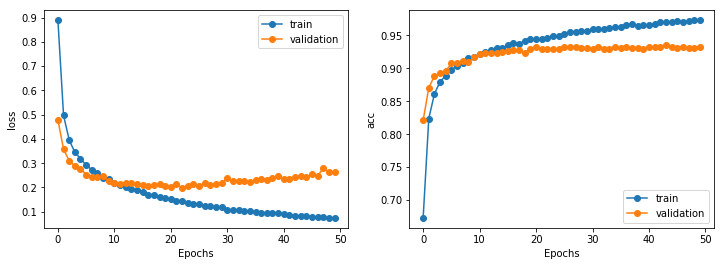

In [10]:
import matplotlib.pyplot as plt

def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    
    
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')

plt.subplot(1,2,2)
plot_train_history(history, 'acc','val_acc')

plt.show()

In [11]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.256563694
Test accuracy: 0.9352


## Prediction accuracy for each category

In [23]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
y_true = data_test.iloc[:, 0]
corrects = np.nonzero(predicted_classes==y_true)[0]
incorrects = np.nonzero(predicted_classes!=y_true)[0]

In [24]:
from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.89      0.89      0.89      1000
    Class 1       0.99      0.99      0.99      1000
    Class 2       0.91      0.90      0.91      1000
    Class 3       0.95      0.93      0.94      1000
    Class 4       0.90      0.91      0.90      1000
    Class 5       0.99      0.98      0.99      1000
    Class 6       0.81      0.82      0.81      1000
    Class 7       0.94      0.99      0.96      1000
    Class 8       0.99      0.99      0.99      1000
    Class 9       0.98      0.96      0.97      1000

avg / total       0.94      0.94      0.94     10000



## Example of correctly recognizable image:

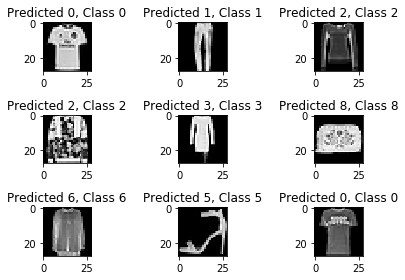

In [26]:
for i, correct in enumerate(corrects[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()
    
plt.show()

## Wrong image example:

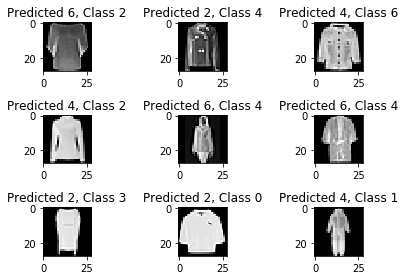

In [28]:
for i, incorrect in enumerate(incorrects[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()
    
plt.show()

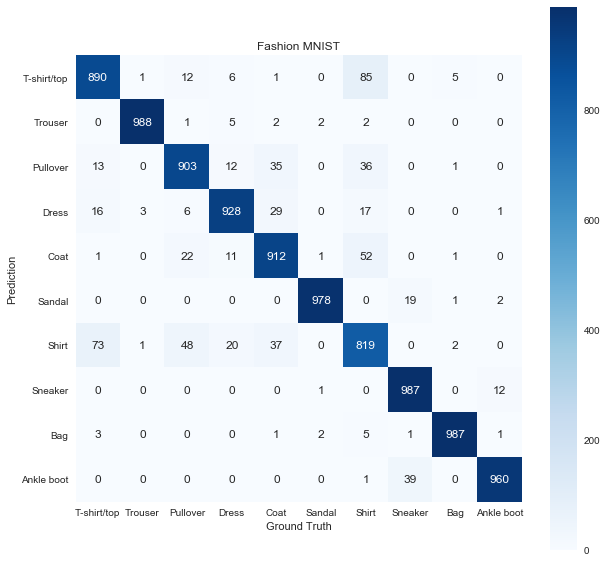

In [31]:
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.metrics import confusion_matrix

target_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", 
                "Sneaker", "Bag", "Ankle boot"]

conf_mat = confusion_matrix(y_true, predicted_classes)
df = pd.DataFrame(conf_mat, index=target_names, columns=target_names)

fig = plt.figure(figsize = (10,10))
sns.heatmap(df, annot=True, square=True, fmt='.0f', cmap="Blues")
plt.title('Fashion MNIST')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')

plt.show()

## Reference:
[zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist)